# TE Properties and Performances Plotting Using Python
***

Untuk membuat grafik dengan `Python` diperlukan beberapa langkah. Langkah yang pertama adalah mengimport library yang diperlukan. Bila Anda pengguna baru dalam bahasa pemrograman `Python`, maka lakukan installasi library, dengan jenis library diunggah pada file `requirements.txt`, pada direktori yang sama. Caranya adalah dengan masuk ke terminal lalu ketikkan 
```console
$ pip install -r requirements.txt
```

In [28]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
from matplotlib import gridspec
import numpy as np
import pandas as pd

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})

In [29]:
#import data 
data = pd.read_csv('../btp/data.dat', sep='\s+|\s+')

#catat nilai LUMO dan HOMO 
lumo = 0.7116
homo = -0.8682
Fermi = (lumo+homo)/2

#nilau tau konstan
tau = 1*10**(-14)

data.head()

/tmp/ipykernel_23252/4103811422.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('../btp/data.dat', sep='\s+|\s+')


,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-1.07407,100,17.4729,7.32709,-0.000023,3.156920e+19,-9.565520e-09,8.199700e+13,0.142794,5.046030e-13
1,-1.07407,200,17.4719,7.57810,-0.000019,3.271220e+19,-2.910670e-09,1.505360e+14,0.263041,5.218890e-13
2,-1.07407,300,17.4712,7.60281,-0.000014,3.214810e+19,-9.462920e-10,2.168200e+14,0.380910,5.235910e-13
3,-1.07407,400,17.4707,7.57292,-0.000014,3.156860e+19,2.919100e-10,2.890290e+14,0.524428,5.215320e-13
4,-1.07407,500,17.4701,7.56985,-0.000017,3.120110e+19,1.188420e-09,3.627740e+14,0.697841,5.213210e-13


In [30]:
#slicing data pada suhu yang diinginkan
data300 = data[data['T[K]']==300].reset_index(drop=True)
data600 = data[data['T[K]']==600].reset_index(drop=True)
data900 = data[data['T[K]']==900].reset_index(drop=True)
data1200 = data[data['T[K]']==1200].reset_index(drop=True)

In [31]:
# data koefisien seebeck
X3_S=data300.iloc[:,0]*13.6057-Fermi
Y3_S=data300.iloc[:,4]
X6_S=data600.iloc[:,0]*13.6057-Fermi
Y6_S=data600.iloc[:,4]
X9_S=data900.iloc[:,0]*13.6057-Fermi
Y9_S=data900.iloc[:,4]
X12_S=data1200.iloc[:,0]*13.6057-Fermi
Y12_S=data1200.iloc[:,4]

In [32]:
# data konduktivitas listrik
X3_s=data300.iloc[:,0]*13.6057-Fermi
Y3_s=data300.iloc[:,5]
X6_s=data600.iloc[:,0]*13.6057-Fermi
Y6_s=data600.iloc[:,5]
X9_s=data900.iloc[:,0]*13.6057-Fermi
Y9_s=data900.iloc[:,5]
X12_s=data1200.iloc[:,0]*13.6057-Fermi
Y12_s=data1200.iloc[:,5]

In [33]:
#data konduktivitas termal
X3_k=data300.iloc[:,0]*13.6057-Fermi
Y3_k=data300.iloc[:,7]
X6_k=data600.iloc[:,0]*13.6057-Fermi
Y6_k=data600.iloc[:,7]
X9_k=data900.iloc[:,0]*13.6057-Fermi
Y9_k=data900.iloc[:,7]
X12_k=data1200.iloc[:,0]*13.6057-Fermi
Y12_k=data1200.iloc[:,7]

In [34]:
# data ZTe
X3_ZTe=data300.iloc[:,0]*13.6057-Fermi
Y3_ZTe=(data300.iloc[:,4]*data300.iloc[:,4]*data300.iloc[:,5])*300*0.1/data300.iloc[:,7]
X6_ZTe=data600.iloc[:,0]*13.6057-Fermi
Y6_ZTe=(data600.iloc[:,4]*data600.iloc[:,4]*data600.iloc[:,5])*600*0.1/data600.iloc[:,7]
X9_ZTe=data900.iloc[:,0]*13.6057-Fermi
Y9_ZTe=(data900.iloc[:,4]*data900.iloc[:,4]*data900.iloc[:,5])*900*0.1/data900.iloc[:,7]
X12_ZTe=data1200.iloc[:,0]*13.6057-Fermi
Y12_ZTe=(data1200.iloc[:,4]*data1200.iloc[:,4]*data1200.iloc[:,5])*1200*0.1/data1200.iloc[:,7]

In [35]:
# data PF
X3_PF=data300.iloc[:,0]*13.6057-Fermi
Y3_PF=(data300.iloc[:,4]*data300.iloc[:,4]*data300.iloc[:,5])
X6_PF=data600.iloc[:,0]*13.6057-Fermi
Y6_PF=(data600.iloc[:,4]*data600.iloc[:,4]*data600.iloc[:,5])
X9_PF=data900.iloc[:,0]*13.6057-Fermi
Y9_PF=(data900.iloc[:,4]*data900.iloc[:,4]*data900.iloc[:,5])
X12_PF=data1200.iloc[:,0]*13.6057-Fermi
Y12_PF=(data1200.iloc[:,4]*data1200.iloc[:,4]*data1200.iloc[:,5])

## Buat Separated Plot

1. Koefisien Seebeck $S$

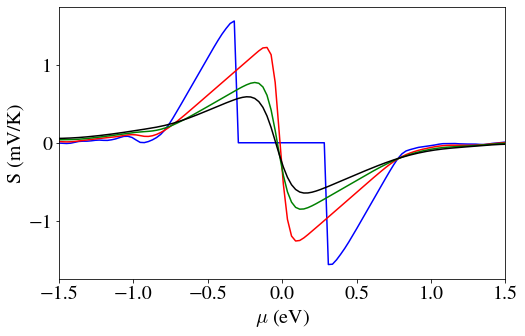

In [41]:
fig = plt.figure(figsize=(8,5))
plt.plot(X3_S,Y3_S*1000, color ='blue', label='300 K')
plt.plot(X6_S,Y6_S*1000, color ='red', label='600 K')
plt.plot(X9_S,Y9_S*1000, color='green', label ='900 K')
plt.plot(X12_S,Y12_S*1000, color='black', label ='1200 K')
plt.ylabel(r'S (mV/K)' )
plt.xlim([-1.5, 1.5])
plt.xlabel(r'$\mu$ (eV)' )
# plt.legend(loc='lower left')
# plt.text(0.8,1,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.show()

2. Konduktivitas listrik $\sigma$

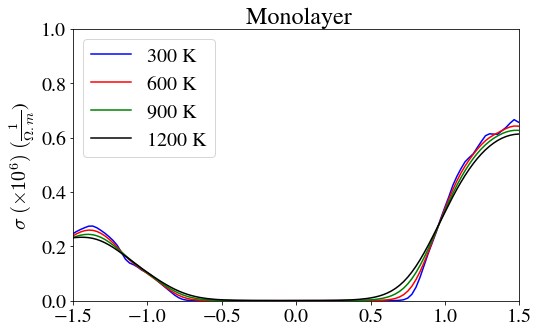

In [42]:
fig = plt.figure(figsize=(8,5))
plt.plot(X3_s,Y3_s*tau*1e-6 , color ='blue', label='300 K')
plt.plot(X6_s,Y6_s*tau*1e-6 , color ='red', label='600 K')
plt.plot(X9_s,Y9_s*tau*1e-6 , color='green', label ='900 K')
plt.plot(X12_s,Y12_s*tau*1e-6 , color='black', label ='1200 K')
plt.title(r' Monolayer')
plt.ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
# # plt.xlabel(r'$\mu$ (eV)' )
plt.xlim([-1.5, 1.5])
plt.ylim([0,1])
plt.legend()
# plt.text(-1.3,2.5,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

3. Konduktivitas termal akibat elektron $\kappa_e$

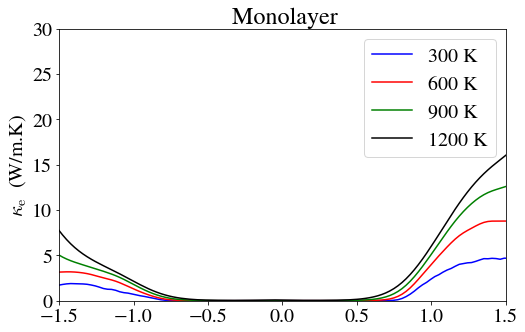

In [43]:
fig = plt.figure(figsize=(8,5))
plt.plot(X3_k,Y3_k*tau , color ='blue', label='300 K')
plt.plot(X6_k,Y6_k*tau , color ='red', label='600 K')
plt.plot(X9_k,Y9_k*tau , color='green', label ='900 K')
plt.plot(X12_k,Y12_k*tau , color='black', label ='1200 K')
plt.title(r' Monolayer')
plt.ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
# # pltxlabel(r'$\mu$ (eV)' )
plt.xlim([-1.5, 1.5])
plt.ylim([0,30])
plt.legend()
# plttext(-1.3,50,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

4. *Figure of Merit* ideal $ZT_e$

(0.0, 10.0)

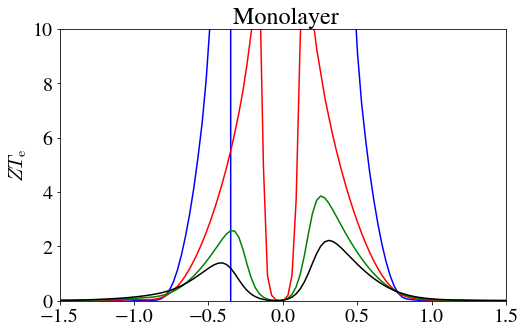

In [44]:
fig = plt.figure(figsize=(8,5))
plt.plot(X3_ZTe,Y3_ZTe, color ='blue', label='300 K')
plt.plot(X6_ZTe,Y6_ZTe, color ='red', label='600 K')
plt.plot(X9_ZTe,Y9_ZTe, color='green', label ='900 K')
plt.plot(X12_ZTe,Y12_ZTe, color='black', label ='1200 K')
plt.title(r' Monolayer')
plt.ylabel(r'$ZT_\mathrm{e}$' )
# plt.xlabel(r'$\mu$ (eV)' )
plt.xlim([-1.5, 1.5])
plt.ylim([0,10])
# plt.legend()
# plt.text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

5. Power Factor $PF$

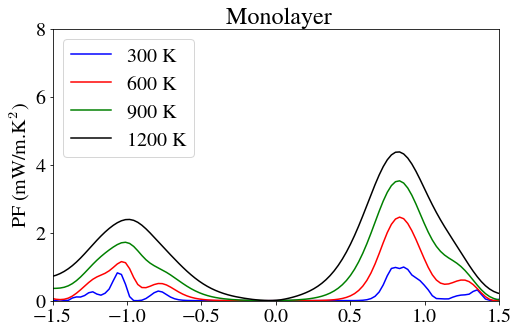

In [45]:
fig = plt.figure(figsize=(8,5))
plt.plot(X3_PF,Y3_PF*tau*1000, color ='blue', label='300 K')
plt.plot(X6_PF,Y6_PF*tau*1000, color ='red', label='600 K')
plt.plot(X9_PF,Y9_PF*tau*1000, color='green', label ='900 K')
plt.plot(X12_PF,Y12_PF*tau*1000, color='black', label ='1200 K')
plt.title(r' Monolayer')
plt.ylabel(r'PF (mW/m.K$^2$)' )
# plt.xlabel(r'$\mu$ (eV)' )
plt.xlim([-1.5, 1.5])
plt.ylim([0,8])
plt.legend()
# plt.text(-1.3,25,r'$\mathrm{Al}_{2}\mathrm{SO}$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))